Step 1. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


step 2 Descriptive

In [7]:
df.describe() # stati summay => numerical data

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Step 3 Visuali

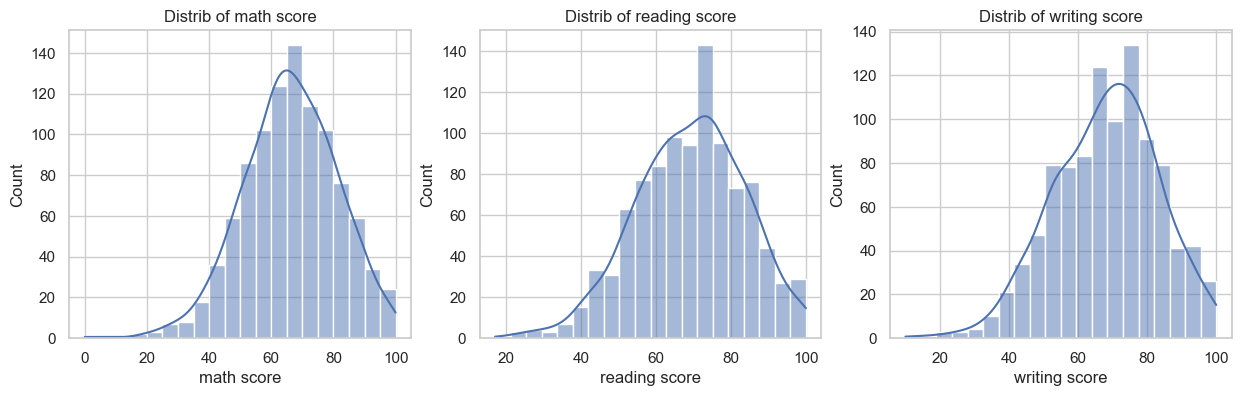

In [12]:
# hist
plt.figure(figsize = (15,4))
for i, subject in enumerate(['math score', 'reading score','writing score']):
    plt.subplot(1,3,i+1)
    sns.histplot(df[subject], kde = True, bins = 20)
    plt.title(f"Distrib of {subject}")
    

In [14]:
# normal dist / Skweness => outliers

Step 4: Probability

In [19]:
prob_math_80 = (df['math score']>80).mean()
print(f"Prob of math score >80 = {prob_math_80:.3f}")

Prob of math score >80 = 0.176


Step 5: Boxplot

Text(0.5, 1.0, 'box test score')

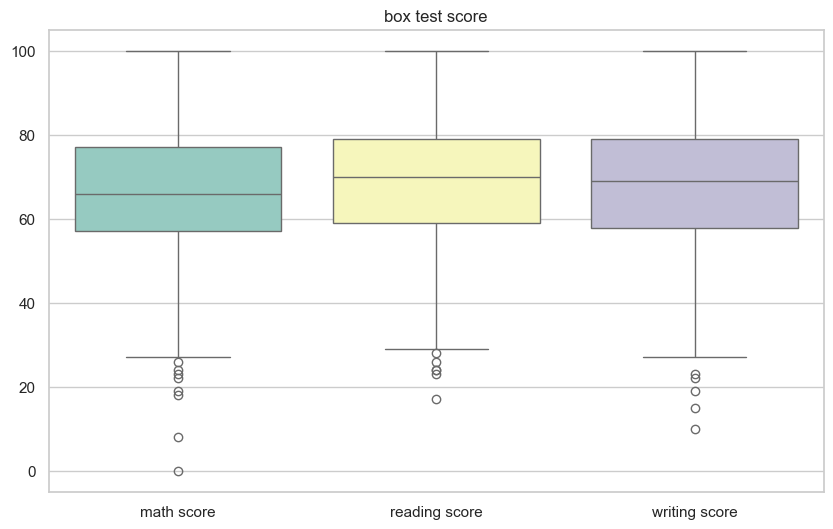

In [24]:
plt.figure(figsize = (10,6))
sns.boxplot(data =df[['math score', 'reading score','writing score']],palette = 'Set3')
plt.title("box test score")

Step 6: Cond prob

In [29]:
p_wr_given_re = ((df['reading score']>80)& (df['writing score']>80)).sum()/(df['reading score']>80)
#print(f"P(write>80|read>80)={p_wr_given_re:.2f}")
print(p_wr_given_re)

0        inf
1      185.0
2      185.0
3        inf
4        inf
       ...  
995    185.0
996      inf
997      inf
998      inf
999    185.0
Name: reading score, Length: 1000, dtype: float64


Step 7 Correlation Matr

In [32]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(),annot =True)
plt.title("Corr between score")

ValueError: could not convert string to float: 'female'

<Figure size 600x400 with 0 Axes>

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Step 8: CLT

<Axes: ylabel='Count'>

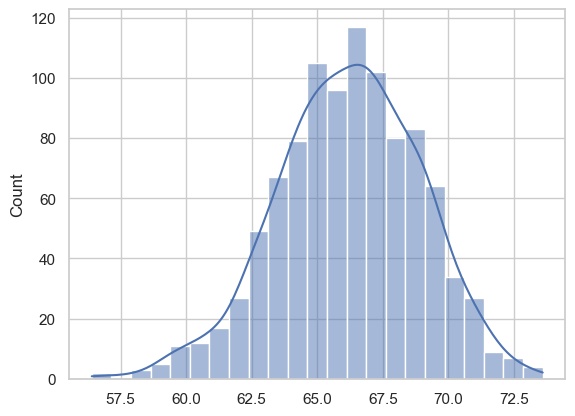

In [37]:
sample_means = []
# 1000 sample
for _ in range(1000):
    sample = df['math score'].sample(30, replace = True)
    sample_means.append(sample.mean())
sns.histplot(sample_means, kde = True)

Step 9: expected value

In [40]:
p_wr_90 = (df['writing score']>90).mean()
expect_count = 100 * p_wr_90
print(expect_count)

6.800000000000001


Step 10 Distribution

Text(0.5, 1.0, 'Uniform /distri')

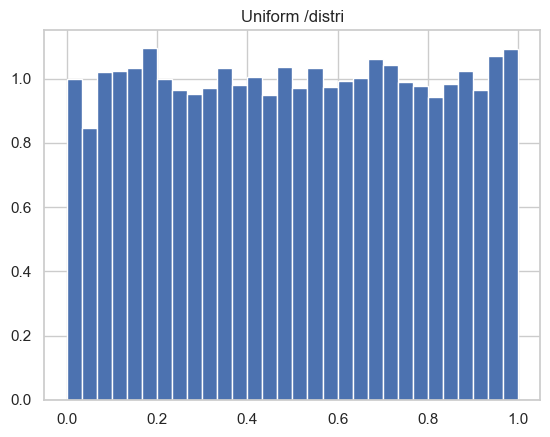

In [43]:
# unifor
x = np.random.uniform(0,1,10000)
plt.hist(x, bins = 30, density = True)
plt.title("Uniform /distri")

In [47]:
# Bernoulli Dis
# 2 out => 1, 0
from scipy.stats import bernoulli



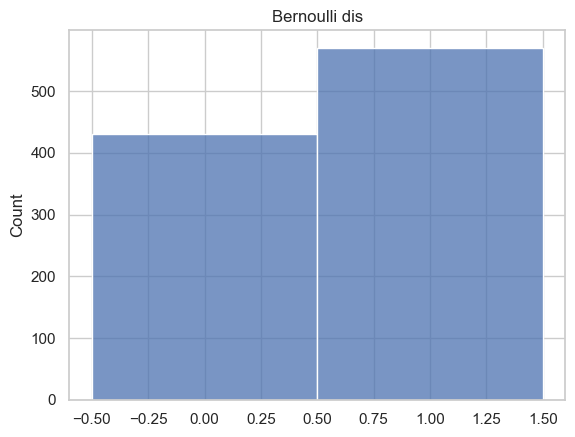

In [49]:
data = bernoulli.rvs(p = 0.6, size = 1000)
sns.histplot(data, discrete=True)
plt.title("Bernoulli dis")
plt.show()

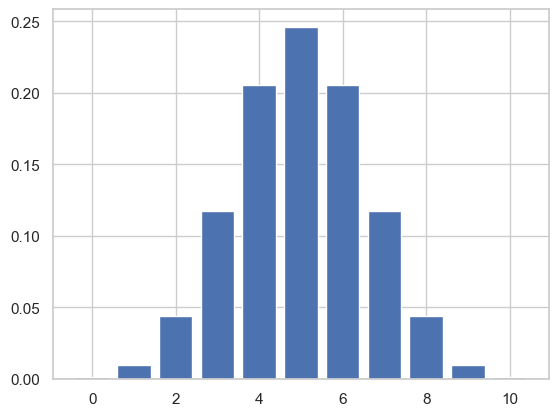

In [51]:
# binomial dis
from scipy.stats import binom
x= np.arange(0,11)
prob = binom.pmf(x, n = 10, p = .5)
plt.bar(x, prob)
plt.show()

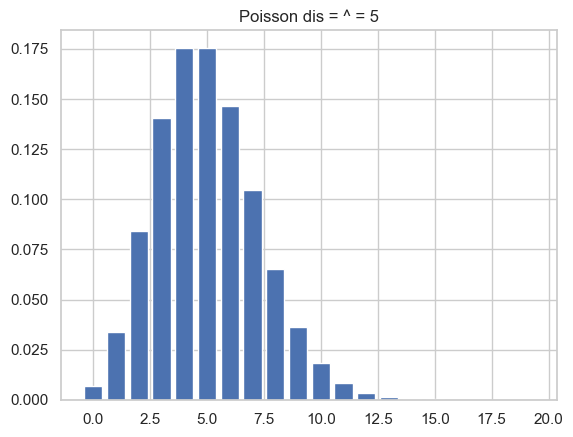

In [53]:
# Poisson Di
from scipy.stats import poisson
x=np.arange(0,20)
pmf = poisson.pmf(x,mu = 5)
plt.bar(x,pmf)
plt.title("Poisson dis = ^ = 5")
plt.show()


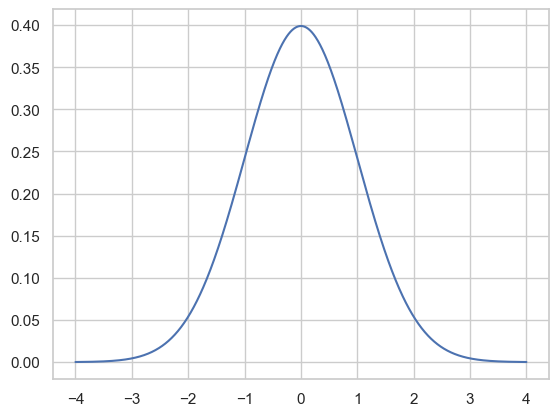

In [55]:
# normal dis
# bell curve cern around the mean => mean, std

from scipy.stats import norm
x = np.linspace(-4,4, 1000)
pdf = norm.pdf(x, loc =0, scale = 1)
plt.plot(x, pdf)
plt.show()

In [59]:
# infere
# estimation
sample = df['math score'].sample(30)
mean_est = sample.mean()
print(mean_est)

60.333333333333336


In [61]:
import scipy.stats as stats
sample = df['math score'].sample(500)
mean = sample.mean()
std_erro = stats.sem(sample)
conf_int = stats.t.interval(0.95, len(sample)-1, loc = mean, scale = std_erro)
print(conf_int)

(64.4426784101588, 67.13332158984119)


In [63]:
# 2 sampl t-test
group1 = df[df['gender']=='male']['math score']
group2 = df[df['gender']=='female']['math score']
t_stat, p_value = stats.ttest_ind(group1,group2)
print(p_value)

9.120185549328822e-08
